In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def plot_ct_and_segmentations_mip(ct_path, suv_path, ground_truth_path, prediction_path):
    # Load NIfTI files
    ct_img = nib.load(ct_path)
    suv_img = nib.load(suv_path)
    ground_truth_img = nib.load(ground_truth_path)
    prediction_img = nib.load(prediction_path)
    
    ct_data = ct_img.get_fdata()
    suv_data = suv_img.get_fdata()
    ground_truth_data = ground_truth_img.get_fdata()
    prediction_data = prediction_img.get_fdata()
    
    # Compute Maximum Intensity Projection (MIP)
    ct_mip = np.max(ct_data, axis=1)
    suv_mip = np.max(suv_data, axis=1)
    ground_truth_mip = np.max(ground_truth_data, axis=1)
    prediction_mip = np.max(prediction_data, axis=1)
    
    # Plot CT MIP
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("CT MIP")
    plt.imshow(ct_mip.T, cmap='gray', origin='lower')
    
    # Plot SUV MIP with Ground Truth segmentation overlay
    plt.subplot(1, 3, 2)
    plt.title("SUV MIP with Ground Truth")
    plt.imshow(suv_mip.T, cmap='gray', origin='lower')
    plt.imshow(ground_truth_mip.T, cmap='jet', alpha=0.5, origin='lower')
    
    # Plot SUV MIP with Prediction segmentation overlay
    plt.subplot(1, 3, 3)
    plt.title("SUV MIP with Prediction")
    plt.imshow(suv_mip.T, cmap='gray', origin='lower')
    plt.imshow(prediction_mip.T, cmap='jet', alpha=0.5, origin='lower')
    
    plt.tight_layout()
    plt.show()



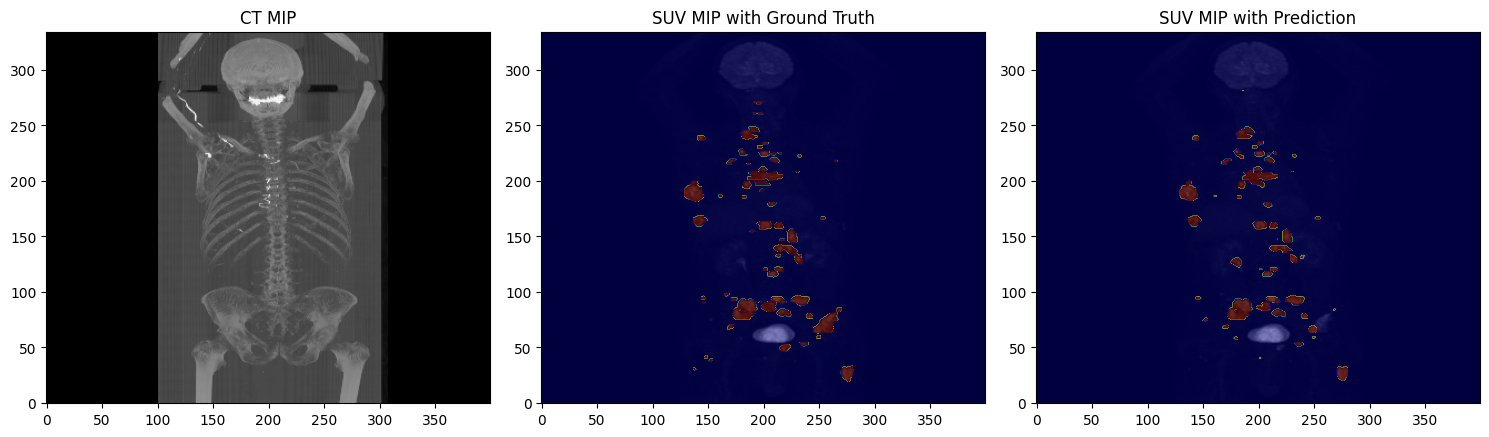

In [8]:
# Paths to the NIfTI files
ct_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/CTres.nii.gz'
suv_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SUV.nii.gz'
ground_truth_path ='/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SEG.nii.gz'
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117.nii.gz'

plot_ct_and_segmentations_mip(ct_path, suv_path, ground_truth_path, prediction_path)

In [17]:
# ### A COPIER POUR IMPORTER LES FONCTIONS
# #import sys
# #sys.path
# #sys.path.append('/Users/Paul/Documents/soft/Python/my_func/')
# #import my_functions_python
# #
# #
# #

# import os
# import nibabel as nib
# import numpy as np
# import SimpleITK as sitk
# # import nilearn
# import shutil
# import glob
# import matplotlib.pylab as plt
# import matplotlib.image as mpimg
# import imageio
# import datetime
# import numpy as np
# import scipy
# from scipy import ndimage
# from tqdm import tqdm
# import pathlib as plb
# import sys
# import cv2
# import pandas as pd


# #### Create MIP GIF
# def create_gif(filenames, duration):
#     images = []
#     for filename in filenames:
#         images.append(imageio.imread(filename))
#     output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
#     imageio.mimsave(output_file, images, duration=duration)

    
# ## Interpolation to account for difference between pixel spacing and slice thickness 
# # interpolation options: 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
# # 8mm/2.03642 spacing = 3.92846269434 pixels/mm =~ 100dpi
# # colormap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# def interpolate_show_MIP(i, nda, suv_max, spacing=(1,1), title=None, margin=0, dpi=100, colormap='Greys', OUTPATH=None,show=False):
#     ysize = nda.shape[0]
#     xsize = nda.shape[1]

#     figsize = (1 + margin) * xsize * spacing[0] / dpi, (1 + margin) * ysize * spacing[1] / dpi

#     fig = plt.figure(title, figsize=figsize, dpi=dpi)
#     ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
#     #hide axis
#     ax.axis('off')
    
#     extent = (0, xsize * spacing[0], 0, ysize * spacing[1])

#     #various papers mentions bicubic interpolation...
#     t = ax.imshow(
# #         nda, extent=extent, interpolation="hamming", cmap="Greys", origin="upper", vmax=suv_max
# #         nda, extent=extent, interpolation="bilinear", cmap="Greys", origin="upper", vmax=suv_max
#         nda, extent=extent, interpolation="bicubic", cmap=colormap, origin="upper", vmax=suv_max 
#     )

#     if title:
#         plt.title(title)
#     if OUTPATH != None:
#         fig.savefig(os.path.join(OUTPATH,'MIP'+'%04d' % (i)+'.png'), dpi = dpi)
#     if not show:
#         plt.close(fig)

    
# def create_mipGIF_from_3D(img,nb_image=2,duration=0.1,is_mask=False,borne_max=None):
#     ls_mip=[]

#     img_data=img.get_fdata()
    
#     w = img.header['pixdim'][1] 
#     y = img.header['pixdim'][3] 
#     spacing = (1, y/w)
#     print('Pixel spacing ratio:', spacing)
    
#     liver_idx = img_data.shape[-1]//2
#     suv_liver = img_data[:,:,liver_idx].squeeze().max()
#     print('Liver SUV max', suv_liver)
    
#     print('Interpolating')
#     img_data+=1e-5
#     for angle in tqdm(np.linspace(0,360,nb_image)):
#         #ls_slice=[]
#         # This step is slow: https://stackoverflow.com/questions/14163211/rotation-in-python-with-ndimage
#         vol_angle= scipy.ndimage.interpolation.rotate(img_data,angle,order=0)
        
#         MIP=np.amax(vol_angle,axis=1)
#         MIP-=1e-5
#         MIP[MIP<1e-5]=0
#         MIP=np.flipud(MIP.T)
#         ls_mip.append(MIP)
#         print('angle:', angle)
    
#     try:
#         shutil.rmtree('MIP/')
#     except:
#         pass
#     os.mkdir('MIP/')
    
#     print('Creating MIP')
#     ls_image=[]
#     for mip,i in zip(ls_mip,range(len(ls_mip))):
# #         fig,ax=plt.subplots()
# #         ax.set_axis_off()
#         if borne_max is None:
#             if is_mask==True:
#                 borne_max=1
#             else:
#                 borne_max=suv_liver
# #         plt.imshow(mip,cmap='Greys',vmax=borne_max)
# #         fig.savefig('MIP/MIP'+'%04d' % (i)+'.png')
# #         plt.close(fig)
#         interpolate_show_MIP(i, mip, borne_max, spacing=spacing)

#     filenames=glob.glob('MIP/*.png')

#     create_gif(filenames, duration)
    
# #     try:
# #         shutil.rmtree('test_gif/')
# #     except:
# #         pass



        
# # Process all the SUV.nii.gz to a MIP_SUV.nii.gz

   
   


In [89]:
suv_path = "/nobackup2/jirayu/data/data/PETCT_9f491f1481/02-12-2006-NA-PET-CT Ganzkoerper  primaer mit KM-19458/SUV.nii.gz"
ground_truth_path ="/nobackup2/jirayu/data/data/PETCT_9f491f1481/02-12-2006-NA-PET-CT Ganzkoerper  primaer mit KM-19458/SEG.nii.gz"
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_9f491f1481_02-12-2006-NA-PET-CT Ganzkoerper  primaer mit KM-19458.nii.gz'
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)


In [127]:
import os
import nibabel as nib
import numpy as np
import scipy
import shutil
import glob
import matplotlib.pylab as plt
import imageio
import datetime
from scipy import ndimage
import matplotlib.colors as mcolors
from tqdm import tqdm

def create_gif(filenames, duration):
    if not filenames:
        print("No filenames provided to create GIF.")
        return
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    imageio.mimsave(output_file, images, duration=duration)
    print(f"GIF saved as {output_file}")

def interpolate_show_MIP(i, nda, suv_max, spacing=(1,1), title=None, margin=0, dpi=100, colormap='Greys', OUTPATH=None, show=False):
    ysize = nda.shape[0]
    xsize = nda.shape[1]

    figsize = (1 + margin) * xsize * spacing[0] / dpi, (1 + margin) * ysize * spacing[1] / dpi

    fig = plt.figure(title, figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
    ax.axis('off')
    
    extent = (0, xsize * spacing[0], 0, ysize * spacing[1])

    t = ax.imshow(
        nda, extent=extent, interpolation="bicubic", cmap=colormap, origin="upper", vmax=suv_max 
    )

    if title:
        plt.title(title)
    if OUTPATH is not None:
        filepath = os.path.join(OUTPATH, 'MIP'+'%04d' % (i)+'.png')
        fig.savefig(filepath, dpi=dpi)
        print(f"Saved image {filepath}")
    if not show:
        plt.close(fig)

def create_mip_images(imgs, nb_image=1, is_mask=False, borne_max=None, outpath='MIP_SUV', is_gt = True):
    ls_mip = []
    img_data = img.get_fdata()
    
    w = img.header['pixdim'][1]
    y = img.header['pixdim'][3]
    spacing = (1, y / w)
    print('Pixel spacing ratio:', spacing)
    
    liver_idx = img_data.shape[-1] // 2
    suv_liver = img_data[:, :, liver_idx].squeeze().max()
    print('Liver SUV max', suv_liver)
    
    print('Interpolating')
    img_data += 1e-5
    for angle in tqdm(np.linspace(0, 360, nb_image)):
        vol_angle = scipy.ndimage.rotate(img_data, angle, order=0)
        
        MIP = np.amax(vol_angle, axis=1)
        MIP -= 1e-5
        MIP[MIP < 1e-5] = 0
        MIP = np.flipud(MIP.T)
        
        ls_mip.append(MIP)
        print('angle:', angle)
    
    try:
        shutil.rmtree(outpath)
    except FileNotFoundError:
        pass
    os.mkdir(outpath)
    
    print('Creating MIP images')
    for mip, i in zip(ls_mip, range(len(ls_mip))):
        if borne_max is None:
            borne_max = 1 if is_mask else suv_liver
        # if is_mask:
        #     # interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath,colormap='Greens')
        #     if is_gt:
        #         interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath,colormap='Greens')
        #     else:
        #         interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath,colormap='Blues')
        # else:
            interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath)
            

def overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_SEG', outpath='MIP_OVERLAY', is_gt=True):
    try:
        shutil.rmtree(outpath)
    except FileNotFoundError:
        pass
    os.mkdir(outpath)
    
    suv_files = sorted(glob.glob(os.path.join(suv_path, '*.png')))
    seg_files = sorted(glob.glob(os.path.join(seg_path, '*.png')))
    
    for suv_file, seg_file, i in zip(suv_files, seg_files, range(len(suv_files))):
        suv_img = plt.imread(suv_file)
        seg_img = plt.imread(seg_file)
        
        fig, ax = plt.subplots()
        ax.imshow(suv_img, cmap='gray')
        ax.imshow(seg_img, cmap= "Greens",alpha=0.2)
        # if is_gt:
        #     ax.imshow(seg_img, cmap=mcolors.ListedColormap(['green', 'gray']) , interpolation='none', alpha=0.5)
        # else:
        #      ax.imshow(seg_img, cmap=mcolors.ListedColormap(['gray', 'blue']) , interpolation='none', alpha=0.5)
            
        ax.axis('off')
        
        filepath = os.path.join(outpath, 'MIP' + '%04d' % (i) + '.png')
        fig.savefig(filepath, dpi=100, bbox_inches='tight', pad_inches=0)
        plt.close(fig)
        print(f"Overlay saved as {filepath}")

    filenames = glob.glob(os.path.join(outpath, '*.png'))
    create_gif(filenames, duration=0.1)





In [132]:
# suv_path = "/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SUV.nii.gz"
# ground_truth_path ="/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SEG.nii.gz"
# prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_3c3050f75e_09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873.nii.gz'
# ct_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/CTres.nii.gz'
suv_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SUV.nii.gz'
ground_truth_path ='/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SEG.nii.gz'
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117.nii.gz'
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)

create_mip_images(suv_img, outpath='MIP_SUV')
create_mip_images(gt_seg_img, is_mask=True, outpath='MIP_SEG')
create_mip_images(pred_seg_img, is_mask=True, outpath='MIP_Pred_SEG')

Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 10.550544738769531
Interpolating


 50%|███████████████████████████████▌                               | 1/2 [00:01<00:01,  1.40s/it]

angle: 0.0


100%|███████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]

angle: 360.0
Creating MIP images
Saved image MIP_SUV/MIP0000.png
Saved image MIP_SUV/MIP0001.png


Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 1.0
Interpolating


 50%|███████████████████████████████▌                               | 1/2 [00:01<00:01,  1.36s/it]

angle: 0.0


100%|███████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]

angle: 360.0
Creating MIP images
Saved image MIP_SEG/MIP0000.png
Saved image MIP_SEG/MIP0001.png


Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 1.0
Interpolating


 50%|███████████████████████████████▌                               | 1/2 [00:01<00:01,  1.36s/it]

angle: 0.0


100%|███████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]

angle: 360.0
Creating MIP images
Saved image MIP_Pred_SEG/MIP0000.png
Saved image MIP_Pred_SEG/MIP0001.png


In [133]:
overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_Pred_SEG', outpath='MIP_OVERLAY_Pred')
overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_SEG', outpath='MIP_OVERLAY')

Overlay saved as MIP_OVERLAY_Pred/MIP0000.png
Overlay saved as MIP_OVERLAY_Pred/MIP0001.png
GIF saved as Gif-2024-06-05-20-06-19.gif
Overlay saved as MIP_OVERLAY/MIP0000.png
Overlay saved as MIP_OVERLAY/MIP0001.png
GIF saved as Gif-2024-06-05-20-06-19.gif


/tmp/ipykernel_3685176/3708508877.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [96]:
np.sum(nib.load(ground_truth_path).get_fdata()),np.sum(nib.load(prediction_path).get_fdata())

(205.0, 0.0)

In [136]:
import os
import nibabel as nib
import numpy as np
import scipy
import shutil
import glob
import matplotlib.pylab as plt
import imageio
import datetime
from scipy import ndimage
import matplotlib.colors as mcolors
from tqdm import tqdm

def create_gif(filenames, duration):
    if not filenames:
        print("No filenames provided to create GIF.")
        return
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    imageio.mimsave(output_file, images, duration=duration)
    print(f"GIF saved as {output_file}")

def interpolate_show_MIP(i, nda, suv_max, spacing=(1,1), title=None, margin=0, dpi=100, colormap='Greys', OUTPATH=None, show=False):
    ysize = nda.shape[0]
    xsize = nda.shape[1]

    figsize = (1 + margin) * xsize * spacing[0] / dpi, (1 + margin) * ysize * spacing[1] / dpi

    fig = plt.figure(title, figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
    ax.axis('off')
    
    extent = (0, xsize * spacing[0], 0, ysize * spacing[1])

    t = ax.imshow(
        nda, extent=extent, interpolation="bicubic", cmap=colormap, origin="upper", vmax=suv_max 
    )

    if title:
        plt.title(title)
    if OUTPATH is not None:
        filepath = os.path.join(OUTPATH, 'MIP'+'%04d' % (i)+'.png')
        fig.savefig(filepath, dpi=dpi)
        print(f"Saved image {filepath}")
    if not show:
        plt.close(fig)

def create_mip_images(img, nb_image=1, is_mask=False, borne_max=None, outpath='MIP_SUV'):
    ls_mip = []
    img_data = img.get_fdata()
    
    w = img.header['pixdim'][1]
    y = img.header['pixdim'][3]
    spacing = (1, y / w)
    print('Pixel spacing ratio:', spacing)
    
    liver_idx = img_data.shape[-1] // 2
    suv_liver = img_data[:, :, liver_idx].squeeze().max()
    print('Liver SUV max', suv_liver)
    
    print('Interpolating')
    img_data += 1e-5
    for angle in tqdm(np.linspace(0, 360, nb_image)):
        vol_angle = scipy.ndimage.rotate(img_data, angle, order=0)
        
        MIP = np.amax(vol_angle, axis=1)
        MIP -= 1e-5
        MIP[MIP < 1e-5] = 0
        MIP = np.flipud(MIP.T)
        
        ls_mip.append(MIP)
        print('angle:', angle)
    
    try:
        shutil.rmtree(outpath)
    except FileNotFoundError:
        pass
    os.mkdir(outpath)
    
    print('Creating MIP images')
    for mip, i in zip(ls_mip, range(len(ls_mip))):
        if borne_max is None:
            borne_max = 1 if is_mask else suv_liver
        interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath)

def overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_SEG', outpath='MIP_OVERLAY'):
    try:
        shutil.rmtree(outpath)
    except FileNotFoundError:
        pass
    os.mkdir(outpath)
    
    suv_files = sorted(glob.glob(os.path.join(suv_path, '*.png')))
    seg_files = sorted(glob.glob(os.path.join(seg_path, '*.png')))
    
    for suv_file, seg_file, i in zip(suv_files, seg_files, range(len(suv_files))):
        suv_img = plt.imread(suv_file)
        seg_img = plt.imread(seg_file)
        
        fig, ax = plt.subplots()
        ax.imshow(suv_img, cmap='gray')
        ax.imshow(seg_img, cmap='Greens', alpha=0.1)
        # ax.imshow(seg_img, cmap=mcolors.ListedColormap(['green', 'none']) , interpolation='none', alpha=1)
        ax.axis('off')
        
        filepath = os.path.join(outpath, 'MIP' + '%04d' % (i) + '.png')
        fig.savefig(filepath, dpi=100, bbox_inches='tight', pad_inches=0)
        plt.close(fig)
        print(f"Overlay saved as {filepath}")

    filenames = glob.glob(os.path.join(outpath, '*.png'))
    create_gif(filenames, duration=0.1)

In [137]:
# suv_path = "/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SUV.nii.gz"
# ground_truth_path ="/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SEG.nii.gz"
# prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_3c3050f75e_09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873.nii.gz'
# ct_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/CTres.nii.gz'
suv_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SUV.nii.gz'
ground_truth_path ='/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SEG.nii.gz'
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117.nii.gz'
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)

create_mip_images(suv_img, outpath='MIP_SUV')
create_mip_images(gt_seg_img, is_mask=True, outpath='MIP_SEG')
create_mip_images(pred_seg_img, is_mask=True, outpath='MIP_Pred_SEG')

overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_Pred_SEG', outpath='MIP_OVERLAY_Pred')
overlay_mip_images(suv_path='MIP_SUV', seg_path='MIP_SEG', outpath='MIP_OVERLAY')

Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 10.550544738769531
Interpolating


100%|███████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]


angle: 0.0
Creating MIP images
Saved image MIP_SUV/MIP0000.png
Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 1.0
Interpolating


100%|███████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.37s/it]

angle: 0.0
Creating MIP images
Saved image MIP_SEG/MIP0000.png


Pixel spacing ratio: (1, 1.4731734)
Liver SUV max 1.0
Interpolating


100%|███████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.37s/it]

angle: 0.0
Creating MIP images
Saved image MIP_Pred_SEG/MIP0000.png
Overlay saved as MIP_OVERLAY_Pred/MIP0000.png
GIF saved as Gif-2024-13-05-20-13-05.gif
Overlay saved as MIP_OVERLAY/MIP0000.png
GIF saved as Gif-2024-13-05-20-13-05.gif



/tmp/ipykernel_3685176/1467852456.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [142]:
import os
import nibabel as nib
import numpy as np
import scipy
import shutil
import glob
import matplotlib.pylab as plt
import imageio
import datetime
from scipy import ndimage
import matplotlib.colors as mcolors
from tqdm import tqdm

# def create_gif(filenames, duration):
#     if not filenames:
#         print("No filenames provided to create GIF.")
#         return
#     images = []
#     for filename in filenames:
#         images.append(imageio.imread(filename))
#     output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
#     imageio.mimsave(output_file, images, duration=duration)
#     print(f"GIF saved as {output_file}")
def create_gif(filenames, duration, output_file):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    # os.makedirs(f'{output_file}', exist_ok=True)
    output_file = output_file +'/Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    print(output_file)
    imageio.mimsave(output_file, images, duration=duration)

# def interpolate_show_MIP(i, nda, suv_max, spacing=(1,1), title=None, margin=0, dpi=100, colormap='Greys', OUTPATH=None, show=False):
#     ysize = nda.shape[0]
#     xsize = nda.shape[1]

#     figsize = (1 + margin) * xsize * spacing[0] / dpi, (1 + margin) * ysize * spacing[1] / dpi

#     fig = plt.figure(title, figsize=figsize, dpi=dpi)
#     ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
#     ax.axis('off')
    
#     extent = (0, xsize * spacing[0], 0, ysize * spacing[1])

#     t = ax.imshow(
#         nda, extent=extent, interpolation="bicubic", cmap=colormap, origin="upper", vmax=suv_max 
#     )

#     if title:
#         plt.title(title)
#     if OUTPATH is not None:
#         filepath = os.path.join(OUTPATH, 'MIP'+'%04d' % (i)+'.png')
#         fig.savefig(filepath, dpi=dpi)
#         print(f"Saved image {filepath}")
#     if not show:
#         plt.close(fig)

def create_mipGIF_from_3D(suv_img, seg_gt_img, seg_pred_img, outfile_path, nb_image=1,duration=0.1,is_mask=False,borne_max=None,):
    ls_suv_mip =[]
    ls_seg_mip_gt = []
    ls_seg_mip_pred = []

    suv_img_data= suv_img.get_fdata()
    seg_gt_data = seg_gt_img.get_fdata()
    seg_pred_data = seg_pred_img.get_fdata()
    
    w = suv_img.header['pixdim'][1] 
    y = suv_img.header['pixdim'][3] 
    spacing = (1, y/w)
    # print('Pixel spacing ratio:', spacing)
    
    liver_idx = suv_img_data.shape[-1]//2
    suv_liver = suv_img_data[:,:,liver_idx].squeeze().max()
    # print('Liver SUV max', suv_liver)
    
    # print('Interpolating')
    suv_img_data+=1e-5
    seg_gt_data +=1e-5
    seg_pred_data += 1e-5
    
    for angle in tqdm(np.linspace(0,360,nb_image)):
        #ls_slice=[]
        # This step is slow: https://stackoverflow.com/questions/14163211/rotation-in-python-with-ndimage
        suv_vol_angle= scipy.ndimage.interpolation.rotate(suv_img_data,angle,order=0)
        seg_gt_vol_angle = scipy.ndimage.interpolation.rotate(seg_gt_data,angle,order=0)
        seg_pred_vol_angle = scipy.ndimage.interpolation.rotate(seg_pred_data,angle,order=0)

        SUV_MIP = np.amax(suv_vol_angle,axis=1)
        SEG_gt_MIP =np.amax(seg_gt_vol_angle,axis=1)
        SEG_pred_MIP =np.amax(seg_pred_vol_angle,axis=1)

        SUV_MIP-=1e-5
        SEG_gt_MIP -=1e-5
        SEG_pred_MIP -=1e-5
        
        SUV_MIP[SUV_MIP<1e-5]=0
        SEG_gt_MIP[SEG_gt_MIP<1e-5]=0
        SEG_pred_MIP[SEG_pred_MIP<1e-5]=0
        
        SUV_MIP=np.flipud(SUV_MIP.T)
        SEG_gt_MIP = np.flipud(SEG_gt_MIP.T)
        SEG_pred_MIP=np.flipud(SEG_pred_MIP.T)


        # print(SUV_MIP)
        # print(f'MIP.shape', MIP.shape)
        ls_suv_mip.append(SUV_MIP)
        ls_seg_mip_gt.append(SEG_gt_MIP)
        ls_seg_mip_pred.append(SEG_pred_MIP)


        # print('angle:', angle)

    # try:
    #     shutil.rmtree('MIP/')
    # except:
    #     pass
    os.makedirs(f'{outfile_path}/MIP/', exist_ok=True)

    print('Creating MIP')
    for suv_mip, seg_gt_mip, seg_pred_mip,i in zip(ls_suv_mip,ls_seg_mip_gt, ls_seg_mip_pred,range(len(ls_suv_mip))):
        fig,ax=plt.subplots()
        ax.set_axis_off()
        if borne_max is None:
            if is_mask==True:
                borne_max=1
            else:
                borne_max=suv_liver
        plt.imshow(suv_mip,cmap='Greys',vmax=borne_max)
        plt.imshow(seg_gt_mip, cmap=mcolors.ListedColormap(['none', 'green']) , interpolation='none', alpha=1)
        plt.imshow(seg_pred_mip, cmap=mcolors.ListedColormap(['none', 'red']), interpolation='none', alpha=0.8)
        fig.savefig(f'{outfile_path}/MIP/MIP'+'%04d' % (i)+'.png')
        # interpolate_show_MIP(i, mip, borne_max, spacing=spacing)

    filenames=glob.glob(f'{outfile_path}/MIP/*.png')
    create_gif(filenames, duration, outfile_path)

def create_mip_images(img, nb_image=1, is_mask=False, borne_max=None, outpath='MIP_SUV'):
    ls_mip = []
    img_data = img.get_fdata()
    
    w = img.header['pixdim'][1]
    y = img.header['pixdim'][3]
    spacing = (1, y / w)
    print('Pixel spacing ratio:', spacing)
    
    liver_idx = img_data.shape[-1] // 2
    suv_liver = img_data[:, :, liver_idx].squeeze().max()
    print('Liver SUV max', suv_liver)
    
    print('Interpolating')
    img_data += 1e-5
    for angle in tqdm(np.linspace(0, 360, nb_image)):
        vol_angle = scipy.ndimage.rotate(img_data, angle, order=0)
        
        MIP = np.amax(vol_angle, axis=1)
        MIP -= 1e-5
        MIP[MIP < 1e-5] = 0
        MIP = np.flipud(MIP.T)
        
        ls_mip.append(MIP)
        print('angle:', angle)
    
    try:
        shutil.rmtree(outpath)
    except FileNotFoundError:
        pass
    os.mkdir(outpath)
    
    print('Creating MIP images')
    for mip, i in zip(ls_mip, range(len(ls_mip))):
        if borne_max is None:
            borne_max = 1 if is_mask else suv_liver
        interpolate_show_MIP(i, mip, borne_max, spacing=spacing, OUTPATH=outpath)

def overlay_and_save(suv_mip, seg_mip, output_path, index, alpha=0.5):
    fig, ax = plt.subplots()
    ax.imshow(suv_mip, cmap='gray')
    ax.imshow(seg_mip, cmap=mcolors.ListedColormap(['none', 'green']), interpolation='none', alpha=alpha)
    ax.axis('off')
    filepath = os.path.join(output_path, 'MIP' + '%04d' % index + '.png')
    fig.savefig(filepath, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    print(f"Overlay saved as {filepath}")

def create_and_overlay_mip_images(suv_img, gt_seg_img, pred_seg_img, nb_image=1):
    suv_outpath = 'MIP_SUV'
    gt_seg_outpath = 'MIP_SEG'
    pred_seg_outpath = 'MIP_Pred_SEG'
    overlay_gt_outpath = 'MIP_OVERLAY'
    overlay_pred_outpath = 'MIP_OVERLAY_Pred'
    
    # Create MIP images for SUV, Ground Truth, and Prediction
    create_mip_images(suv_img, nb_image=nb_image, outpath=suv_outpath)
    create_mip_images(gt_seg_img, nb_image=nb_image, is_mask=True, outpath=gt_seg_outpath)
    create_mip_images(pred_seg_img, nb_image=nb_image, is_mask=True, outpath=pred_seg_outpath)

    # Overlay MIP images
    try:
        shutil.rmtree(overlay_gt_outpath)
        shutil.rmtree(overlay_pred_outpath)
    except FileNotFoundError:
        pass
    os.mkdir(overlay_gt_outpath)
    os.mkdir(overlay_pred_outpath)
    
    suv_files = sorted(glob.glob(os.path.join(suv_outpath, '*.png')))
    gt_seg_files = sorted(glob.glob(os.path.join(gt_seg_outpath, '*.png')))
    pred_seg_files = sorted(glob.glob(os.path.join(pred_seg_outpath, '*.png')))
    
    for i, (suv_file, gt_seg_file, pred_seg_file) in enumerate(zip(suv_files, gt_seg_files, pred_seg_files)):
        suv_img = plt.imread(suv_file)
        gt_seg_img = plt.imread(gt_seg_file)
        pred_seg_img = plt.imread(pred_seg_file)
        
        overlay_and_save(suv_img, gt_seg_img, overlay_gt_outpath, i, alpha=0.5)
        overlay_and_save(suv_img, pred_seg_img, overlay_pred_outpath, i, alpha=0.5)
    
    gt_filenames = glob.glob(os.path.join(overlay_gt_outpath, '*.png'))
    pred_filenames = glob.glob(os.path.join(overlay_pred_outpath, '*.png'))
    
    create_gif(gt_filenames, duration=0.1)
    create_gif(pred_filenames, duration=0.1)




  0%|                                                                       | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_3685176/3832759930.py:84: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  suv_vol_angle= scipy.ndimage.interpolation.rotate(suv_img_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:85: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_gt_vol_angle = scipy.ndimage.interpolation.rotate(seg_gt_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:86: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_pred_vol_angle = scipy.ndimage.interpolation.rotate(seg_pred_data,angle,order=0)
100%|█████

Creating MIP
/nobackup2/jirayu/data/visualization/PETCT_3c3050f75e_09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/Gif-2024-29-05-20-29-18.gif



/tmp/ipykernel_3685176/3832759930.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


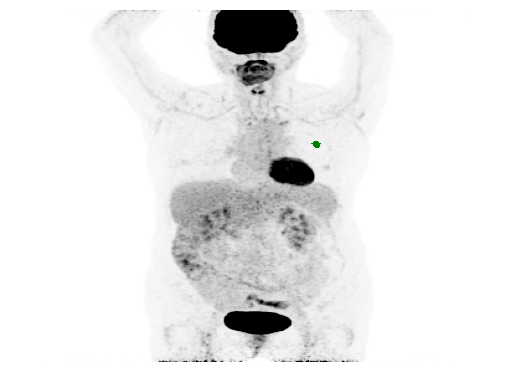

In [147]:
# Define paths
# suv_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SUV.nii.gz'
# ground_truth_path ='/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SEG.nii.gz'
# prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117.nii.gz'

# Load images
# suv_img = nib.load(suv_path)
# gt_seg_img = nib.load(ground_truth_path)
# pred_seg_img = nib.load(prediction_path)

suv_path = "/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SUV.nii.gz"
ground_truth_path ="/nobackup2/jirayu/data/data/PETCT_3c3050f75e/09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873/SEG.nii.gz"
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_3c3050f75e_09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873.nii.gz'
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)
visualize_out_path = "/nobackup2/jirayu/data/visualization/PETCT_3c3050f75e_09-05-2002-NA-PET-CT Ganzkoerper  primaer mit KM-31873"

# Create and overlay MIP images
# create_and_overlay_mip_images(suv_img, gt_seg_img, pred_seg_img, nb_image=1)
create_mipGIF_from_3D(suv_img, gt_seg_img, pred_seg_img, visualize_out_path)

  0%|                                                                       | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_3685176/3832759930.py:84: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  suv_vol_angle= scipy.ndimage.interpolation.rotate(suv_img_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:85: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_gt_vol_angle = scipy.ndimage.interpolation.rotate(seg_gt_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:86: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_pred_vol_angle = scipy.ndimage.interpolation.rotate(seg_pred_data,angle,order=0)
100%|█████

Creating MIP
/nobackup2/jirayu/data/visualization/PETCT_bef465b4ad_05-04-2007-NA-PET-CT Ganzkoerper  primaer mit KM-73031/Gif-2024-32-05-20-32-05.gif



/tmp/ipykernel_3685176/3832759930.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


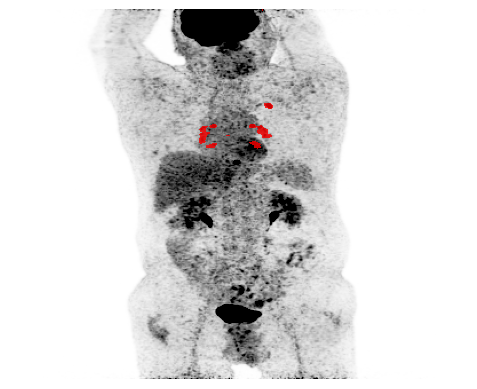

In [150]:
suv_path = "/nobackup2/jirayu/data/data/PETCT_bef465b4ad/05-04-2007-NA-PET-CT Ganzkoerper  primaer mit KM-73031/SUV.nii.gz"
ground_truth_path ="/nobackup2/jirayu/data/data/PETCT_bef465b4ad/05-04-2007-NA-PET-CT Ganzkoerper  primaer mit KM-73031/SEG.nii.gz"
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_bef465b4ad_05-04-2007-NA-PET-CT Ganzkoerper  primaer mit KM-73031.nii.gz'
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)
visualize_out_path = "/nobackup2/jirayu/data/visualization/PETCT_bef465b4ad_05-04-2007-NA-PET-CT Ganzkoerper  primaer mit KM-73031"
create_mipGIF_from_3D(suv_img, gt_seg_img, pred_seg_img, visualize_out_path)


  0%|                                                                       | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_3685176/3832759930.py:84: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  suv_vol_angle= scipy.ndimage.interpolation.rotate(suv_img_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:85: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_gt_vol_angle = scipy.ndimage.interpolation.rotate(seg_gt_data,angle,order=0)
/tmp/ipykernel_3685176/3832759930.py:86: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  seg_pred_vol_angle = scipy.ndimage.interpolation.rotate(seg_pred_data,angle,order=0)
100%|█████

Creating MIP
/nobackup2/jirayu/data/visualization/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/Gif-2024-36-05-20-36-51.gif



/tmp/ipykernel_3685176/3832759930.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


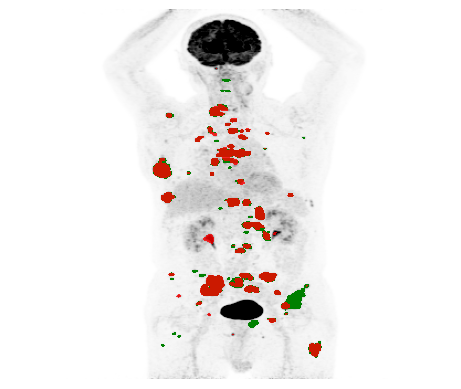

In [152]:
# suv_path = "/nobackup2/jirayu/data/data/PETCT_c252d734a0/08-09-2003-NA-PET-CT Ganzkoerper nativ-85011/SUV.nii.gz"
# ground_truth_path = "/nobackup2/jirayu/data/data/PETCT_c252d734a0/08-09-2003-NA-PET-CT Ganzkoerper nativ-85011/SEG.nii.gz"
# prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_c252d734a0_08-09-2003-NA-PET-CT Ganzkoerper nativ-85011.nii.gz'
suv_path = '/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SUV.nii.gz'
ground_truth_path ='/nobackup2/jirayu/data/data/PETCT_a82f03863a/03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117/SEG.nii.gz'
prediction_path ='/nobackup2/jirayu/data/Dataset700_PET_CT_Recon_test/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117.nii.gz'

# Load images
suv_img = nib.load(suv_path)
gt_seg_img = nib.load(ground_truth_path)
pred_seg_img = nib.load(prediction_path)
visualize_out_path = "/nobackup2/jirayu/data/visualization/PETCT_a82f03863a_03-19-2007-NA-PET-CT Ganzkoerper  primaer mit KM-75117"
create_mipGIF_from_3D(suv_img, gt_seg_img, pred_seg_img, visualize_out_path)

